In [1]:

import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile
from numpy.fft import fft, ifft
import scipy.signal as sig


external dependencies:
* ./AmAud1.py
* ./audiolibrary.json
* ./footprints.json (output)

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///capstone_orchestra.db

# definition of the Signal Processor object
### the class definition is stored in a separate file so that it will be shared among multiple notebooks

In [4]:
from AmAud1 import AmAud1

# definition of the samples

11 samples taken from two separate online archives - one for training purposes and one for testing
* https://theremin.music.uiowa.edu/MIS-Pitches-2012/ - for training (6 samples)
* https://freesound.org - for testing (5 samples)

In [5]:
import json
with open('audiolibrary.json') as audiolibrary_file:
    library = json.load(audiolibrary_file)
    
print('library loaded with',len(library),'items')

library loaded with 18 items


In [6]:
def check_uniqueness_of_library_field(library,field):
    labels = [ dd[field] for dd in library]
    print(len(labels),field)
    return len(labels) == len(set(labels))

In [7]:
assert check_uniqueness_of_library_field(library,'label')
assert check_uniqueness_of_library_field(library,'wav')

18 label
18 wav


# feature engineering

## loading the audio wav files of the library
### + minmax scaling and cutting

In [8]:
def do_dataexp_samples(library):
    #hyperparams
    objects = []
    for ddi in range(len(library)):
        dd=library[ddi]
        aa = AmAud1(dd['label'],dd)
        take_from = dd['take_s'][0]
        take_size = dd['take_s'][1]
        aa.load_wav_file(dd['wav']).minmaxscaled().set_pcm_cut_s(take_from,take_size)
        print(aa)
        objects.append(aa)
    return objects

In [9]:
objects = do_dataexp_samples(library)
print('loaded',len(objects),'samples')

name: M:/DATALAKE/AUDIO/theremin_music_uiowa_edu/aiff2wav-via-audacity/Bassoon.ff.A3.stereo.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (89670, 2)
channel 0 min -5216 max 5778
channel 1 min -5222 max 5772
len(pcm0) 89670 -1
['time minmax [ms]', 0.0, 2033.3106575963718]
original dtype: <class 'numpy.int16'> range: -5216 5778 absmax 5778
samples_to_take: 44100 (1s)
first_sample_to_take: 8820 (0.2s)
LABEL=Bassoon1a
len(pcm)=89670 sps=44100 pcm_win=[8820,52920] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9027345102111457 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
name: M:/DATALAKE/AUDIO/freesound/21001__samulis__vsco-2-ce-woodwinds-bassoon-sustain/372667__samulis__bassoon-sustain-a4-psbassoon_a3_v1_1.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (428309, 2)
channel 0 min -4055 max 4127
channel 

M:\DEV\python\NOTEBOOKS\coursera_datascience_advanced_ibm\AmAud1.py:91: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(wavfn)
M:\DEV\python\NOTEBOOKS\coursera_datascience_advanced_ibm\AmAud1.py:91: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  fs, snd = wavfile.read(wavfn)


LABEL=Cello3a_x
len(pcm)=127564 sps=44100 pcm_win=[30869,74969] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-1.0 pcm_max=0.6444960041247745
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
name: M:/DATALAKE/AUDIO/theremin_music_uiowa_edu/aiff2wav-via-audacity/Horn.ff.A4.stereo.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (100673, 2)
channel 0 min -2772 max 5458
channel 1 min -2771 max 5464
len(pcm0) 100673 0
['time minmax [ms]', 0.0, 2282.8117913832198]
original dtype: <class 'numpy.int16'> range: -2772 5458 absmax 5458
samples_to_take: 44100 (1s)
first_sample_to_take: 8820 (0.2s)
LABEL=FrHorn1a
len(pcm)=100673 sps=44100 pcm_win=[8820,52920] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.5078783437156468 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at 

# performing the Time-to-Frequency transformation 
## and plotting it on a y-log scale

withSpectrum() max_freq returned by the FFT= 44099.0
withSpectrum() max_freq after cut= 22049.0
withSpectrum() fft freq bands: 22050
withSpectrum() width: 1.0 Hz
withSpectrum() global peak: 445.0 Hz
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
withSpectrum() max_freq returned by the FFT= 44099.0
withSpectrum() max_freq after cut= 22049.0
withSpectrum() fft freq bands: 22050
withSpectrum() width: 1.0 Hz
withSpectrum() global peak: 440.0 Hz
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
withSpectrum() max_freq returned by the FFT= 44099.0
withSpectrum() max_freq after cut= 22049.0
withSpectrum() fft freq bands: 22050
withSpectrum() width: 1.0 Hz
withSpectrum() global peak: 597.0 Hz
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
withSpectrum(

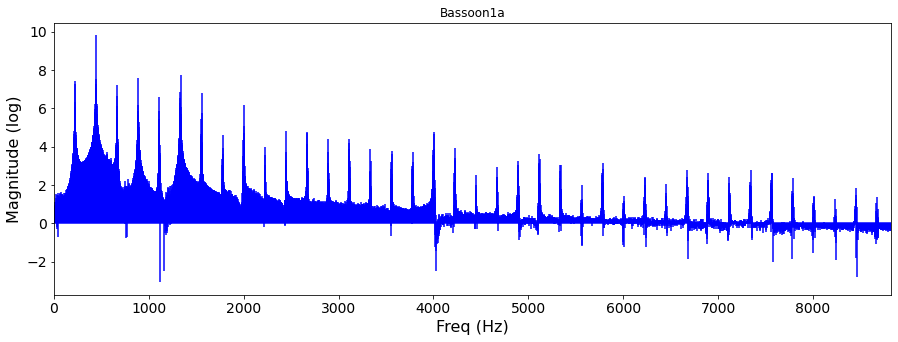

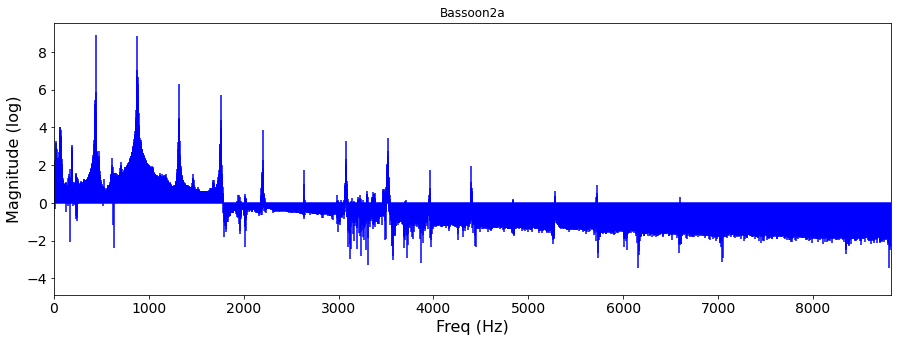

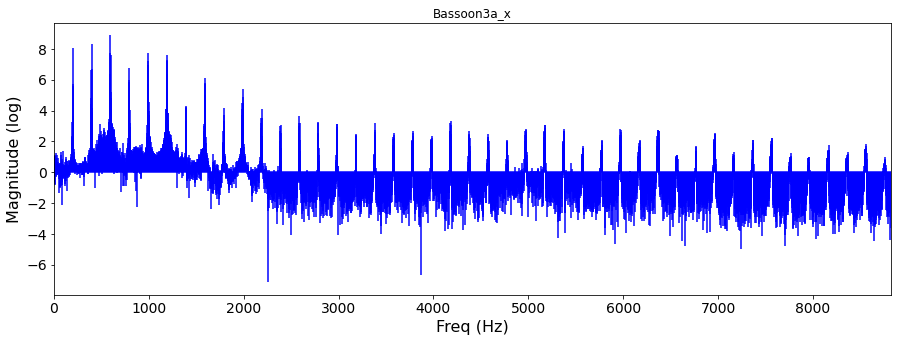

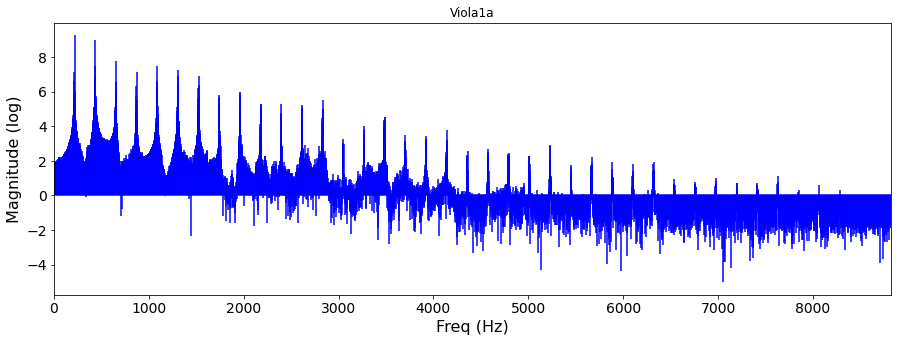

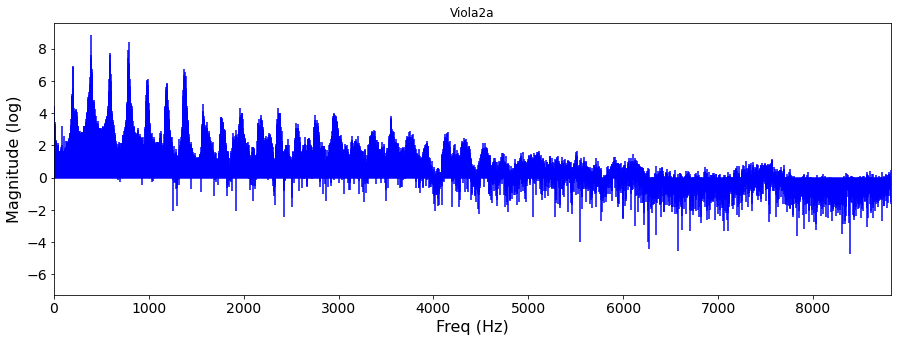

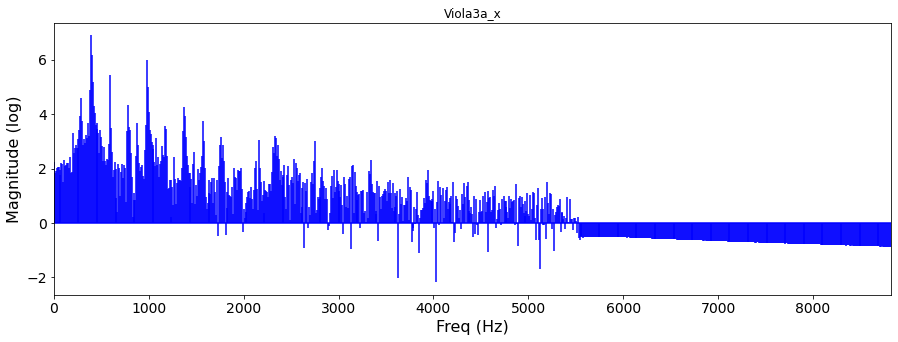

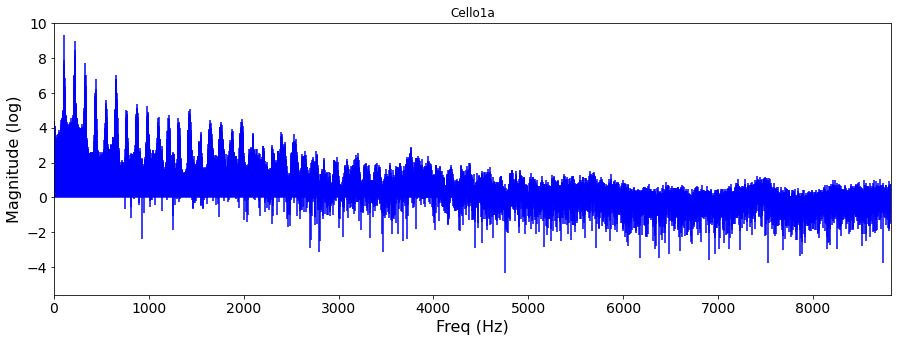

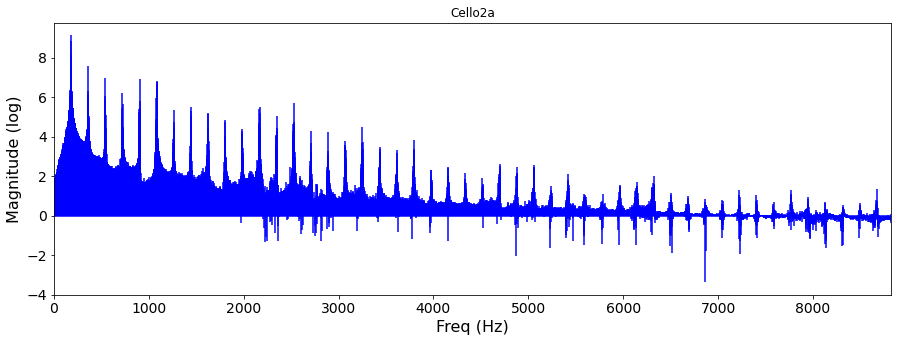

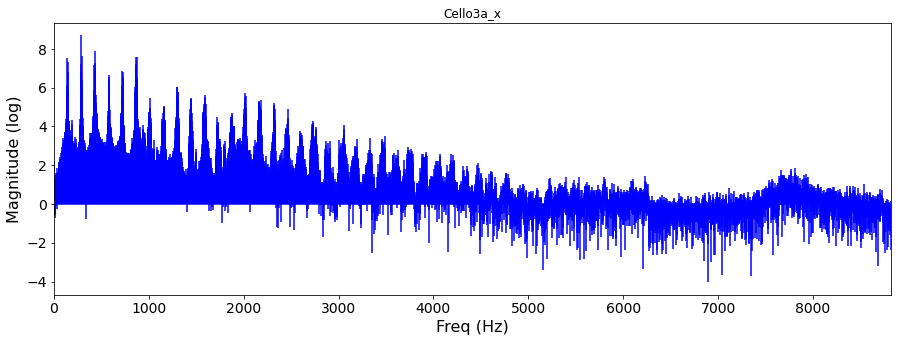

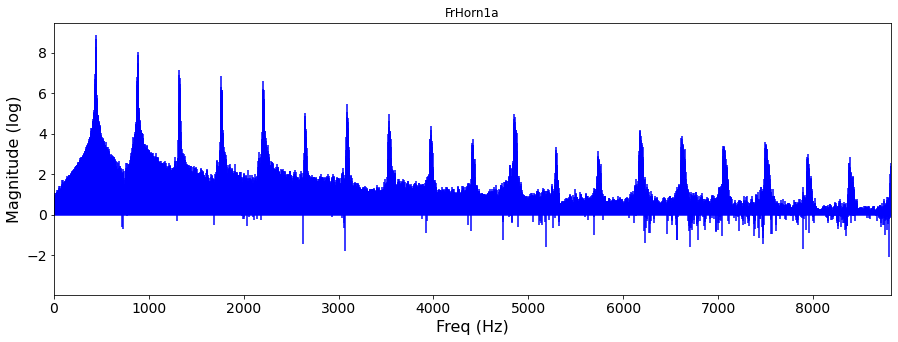

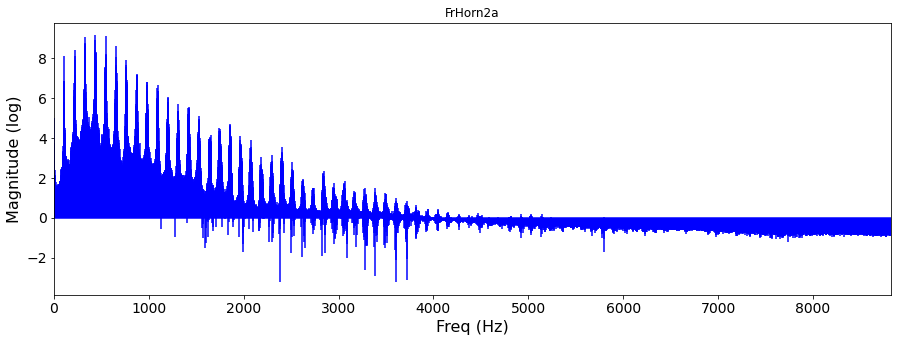

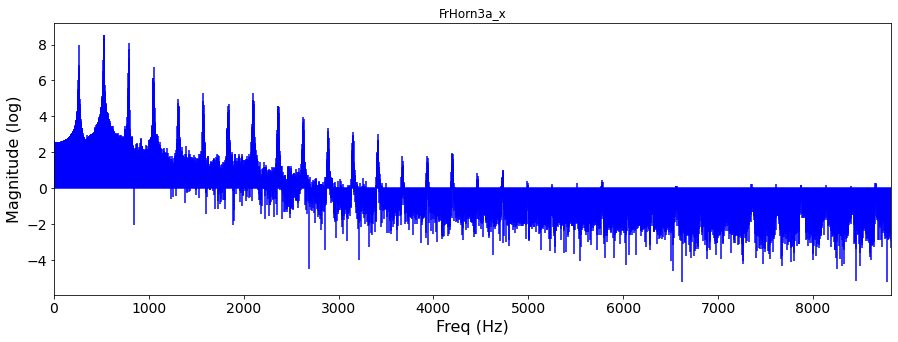

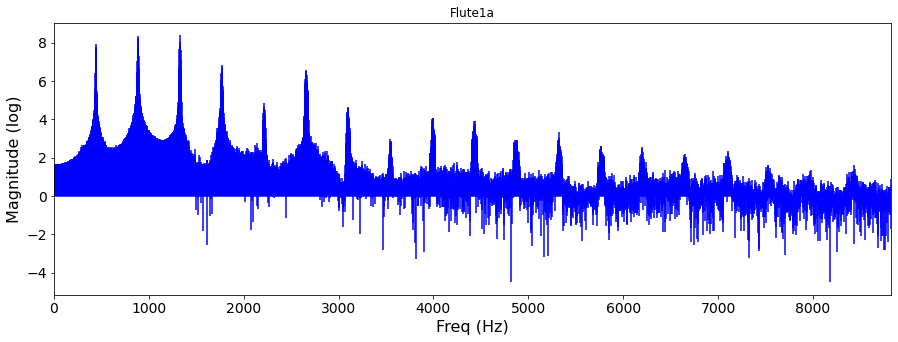

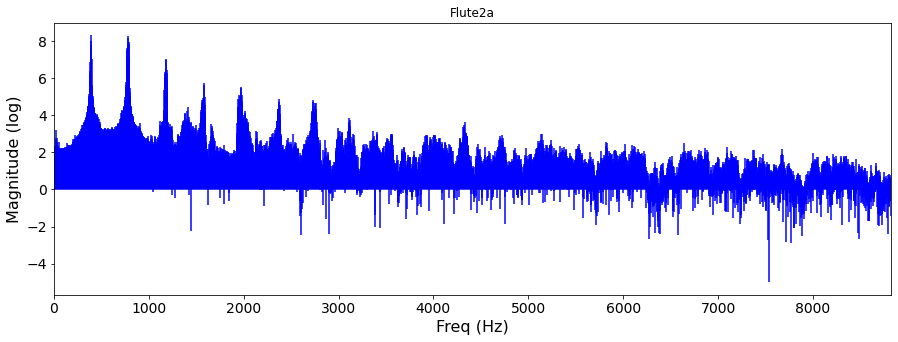

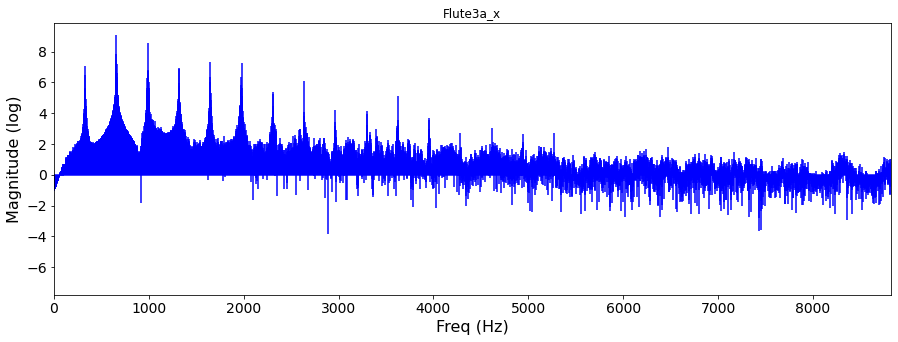

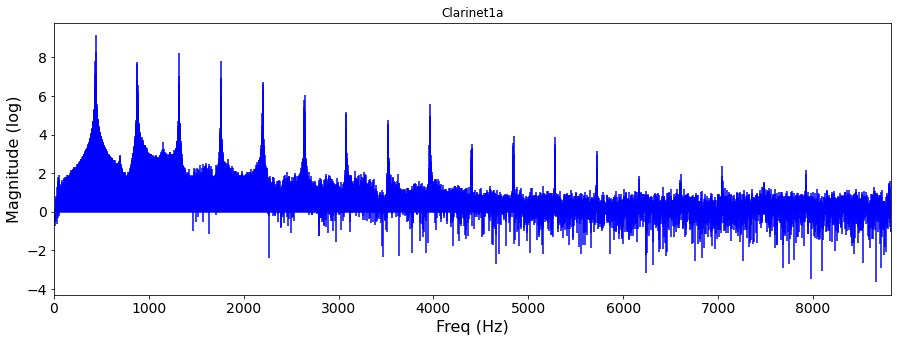

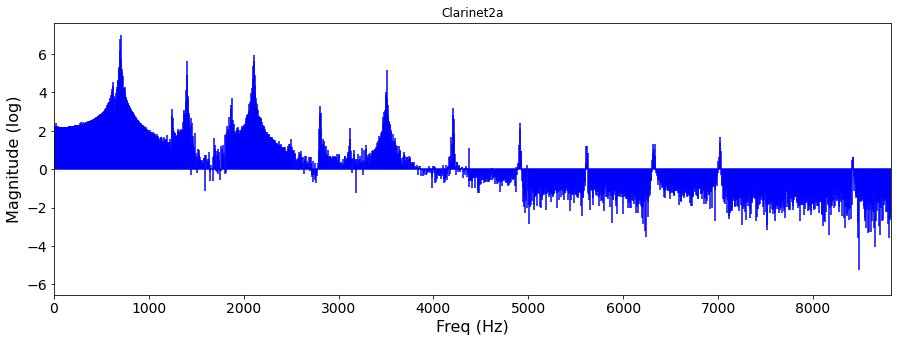

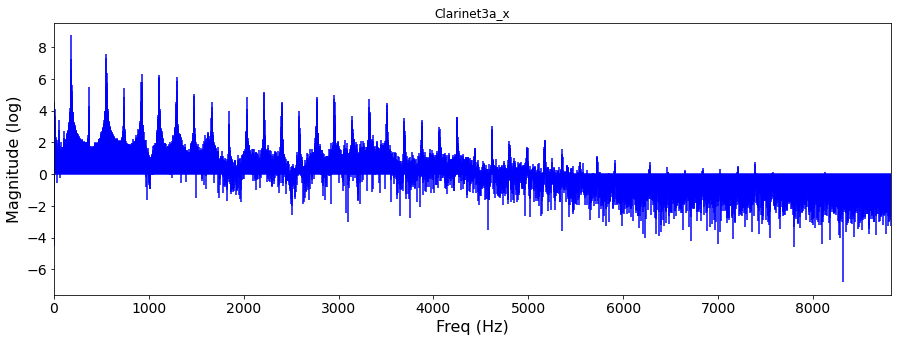

In [10]:
for i in range(len(objects)):
    objects[i] = objects[i].withSpectrum()
    objects[i].util_plot_spectrum_freqband(0,44100/4,sharpened=False,normalized=False)

## feature engineering:
in order to better support pattern matching,
* we take the peaks and flatten the rest of the spectrum;
* we normalize: all the played notes become A440 Hz;
* we then plot the resulting processed spectrum on a y-log scale.

In [11]:
hyperparams = {
    'promin1':44100/1000,
    'promin2':44100/1000,
    'pick_strategy':'verymaxnextdist',
    'safe_dist_factor':0.9,
    'safe_dist2':20}

In [12]:
hyperparams = {
    'promin1':44100/10000,
    'promin2':44100/100,
    'pick_strategy':'lowtrim2',
    'safe_dist_factor':0.9,
    'safe_dist2':20}

In [13]:
hyperparams = {
    'promin1':44100/4400,
    'promin2':44100/100,
    'pick_strategy':'lowtrim2',
    'safe_dist_factor':0.9,
    'safe_dist2':20}

In [14]:
hyperparams = {
    'promin1':44100/1000,
    'promin2':44100/100,
    'pick_strategy':'lowtrim2',
    'safe_dist_factor':0.9,
    'safe_dist2':20}

In [15]:
for i in range(len(objects)):
    objects[i] = objects[i].with_sharpened_mag(hyperparams)

Bassoon1a with_sharpened_mag() BEGIN {'promin1': 44.1, 'promin2': 441.0, 'pick_strategy': 'lowtrim2', 'safe_dist_factor': 0.9, 'safe_dist2': 20}
pass1 doing find_peaks() prominence = 441.0 distance= 20
pass1 len(peaks) 8
pass1 peaks_x [ 222  445  667  890 1112 1335 1557 2002]
pass1 freqs of peaks_x [ 222.  445.  667.  890. 1112. 1335. 1557. 2002.]
pass1 mags of peaks_x [ 1689.081825   18073.12627621  1348.62961055  1962.2882491
   708.0489917   2250.63714665   906.65588046   475.16120926]
pass1 prominences {'prominences': array([ 1666.17837772, 18072.63431701,  1338.28133072,  1961.81491262,
         703.57782535,  2250.59168433,   900.95878044,   474.10792509]), 'left_bases': array([  40,   40,  607,  757, 1047, 1121, 1506, 1978], dtype=int64), 'right_bases': array([  303, 19587,   757,  1121,  1121, 19587, 19587, 19587],
      dtype=int64)}
pass2 doing find_peaks() prominence = 44.1 distance= 222  *  0.9 = 199.8
pass2 len(peaks) 17
pass2 peaks_x [ 222  445  667  890 1112 1335 1557 17

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  return put(ind, v, mode=mode)


pass2 len(peaks) 19
pass2 peaks_x [   3  185  370  554  739  924 1109 1294 1479 1663 1847 2033 2218 2402
 2587 2772 2957 3325 3509]
pass2 freqs of peaks_x [3.000e+00 1.850e+02 3.700e+02 5.540e+02 7.390e+02 9.240e+02 1.109e+03
 1.294e+03 1.479e+03 1.663e+03 1.847e+03 2.033e+03 2.218e+03 2.402e+03
 2.587e+03 2.772e+03 2.957e+03 3.325e+03 3.509e+03]
pass2 mags of peaks_x [  95.42323939 6254.29868816  246.32032154 1895.07884334  230.98275358
  563.59060897  527.26486605  447.77842287  151.01784225   95.23182535
   51.84177171  132.45606703  181.32637198   96.09288947   51.78821787
  128.15486464  144.03420377  111.37702042   86.56340324]
pass2 prominences {'prominences': array([  94.84507006, 6254.28779741,  241.35728397, 1891.60760857,
        225.94904278,  560.3739191 ,  527.07500619,  447.02128106,
        150.44524044,   95.00944014,   51.66236585,  132.08564318,
        181.15726066,   95.79455794,   51.6339567 ,  127.99909366,
        143.95723274,  111.326926  ,   86.25700882]), 'l

fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...


M:\DEV\python\NOTEBOOKS\coursera_datascience_advanced_ibm\AmAud1.py:302: RuntimeWarning: divide by zero encountered in log
  np.log(yy[plot_hz_inf_i:plot_hz_sup_i]), 'b', markerfmt=" ", basefmt="-b")


fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 1102
len: 2205 freq12..n 0.0 10.0 22040.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 22050
len: 48000 freq12..n 0.0 0.5 23999.5
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..n 0.0 1.0 22049.0
PLOTTING Spectrum...
fft hz inf: 0
fft hz sup: 11025.0
plot_hz_inf_i: 0
plot_hz_sup_i: 11025
len: 22050 freq12..

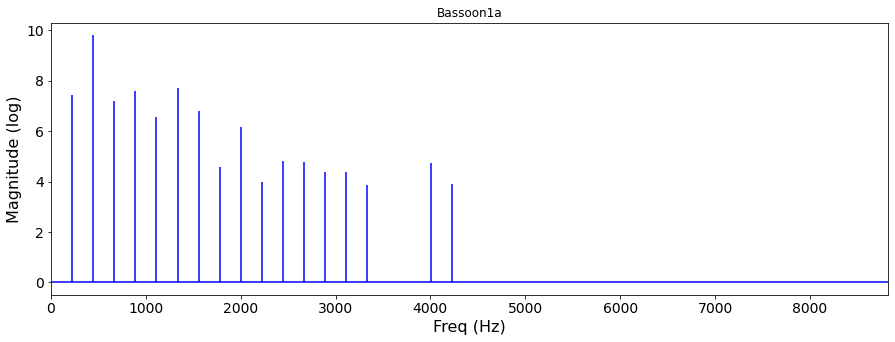

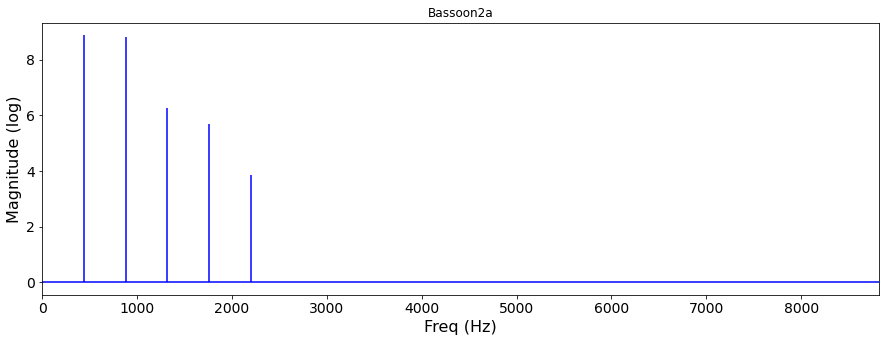

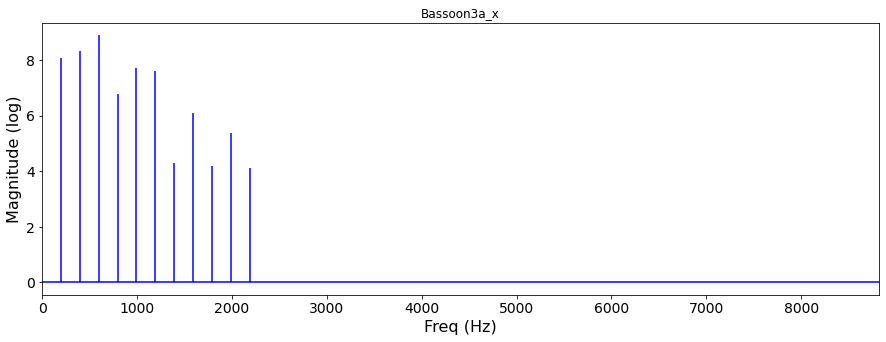

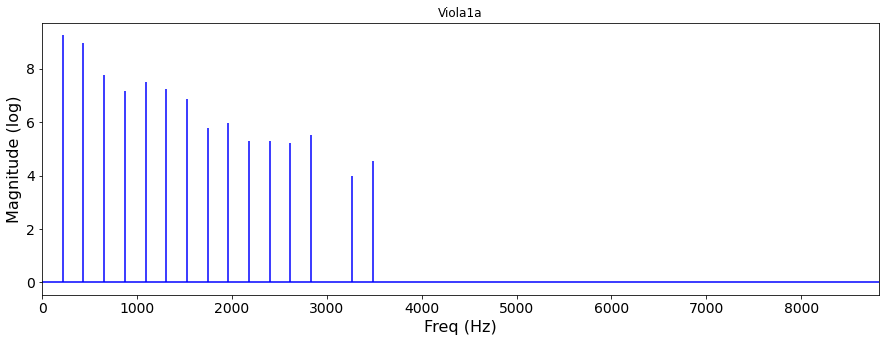

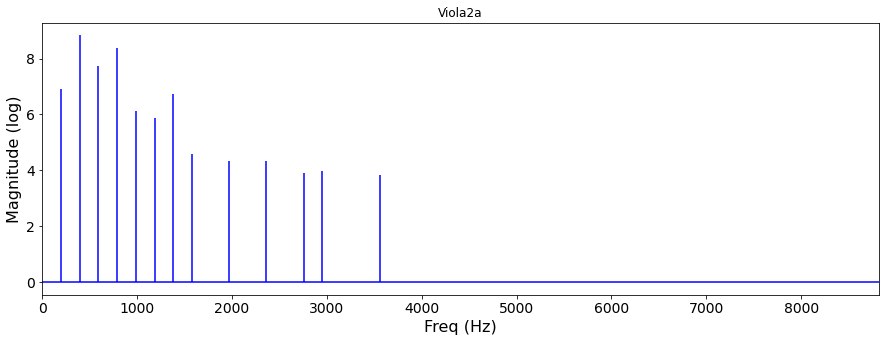

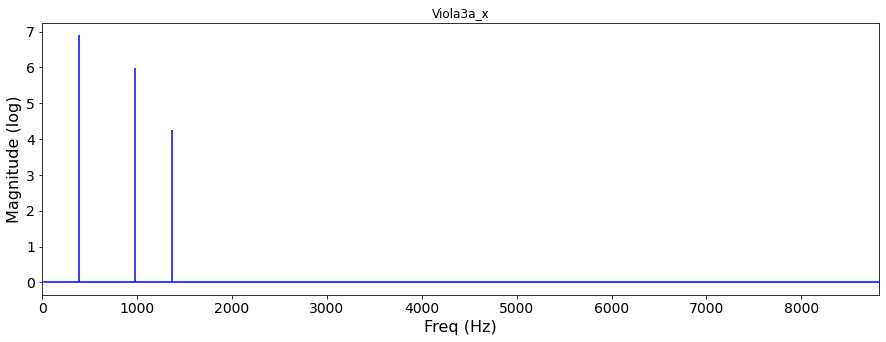

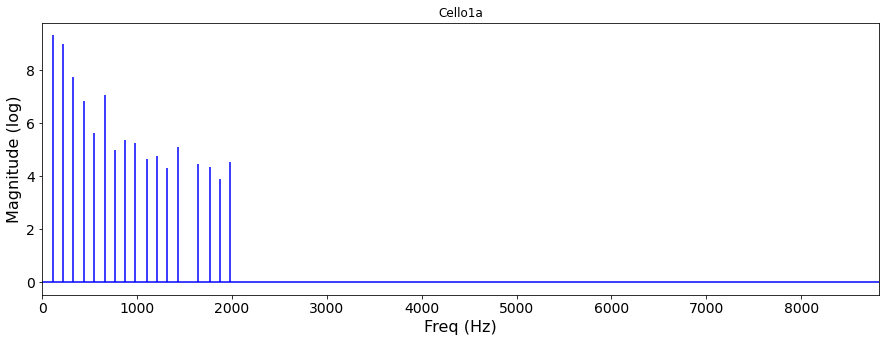

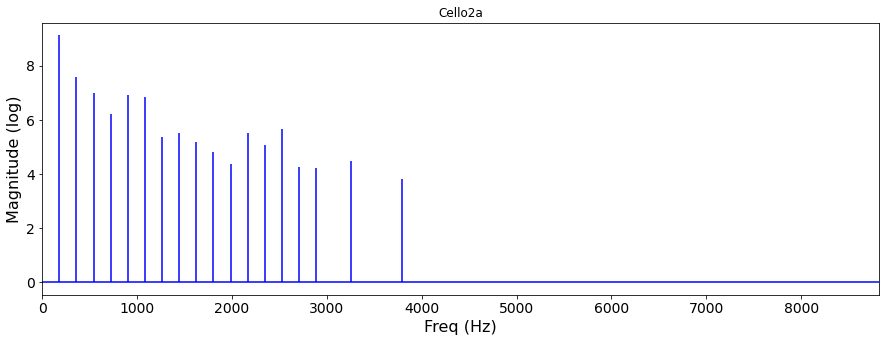

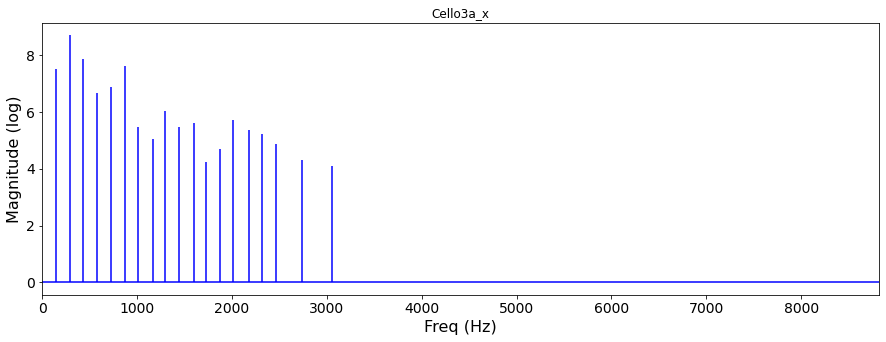

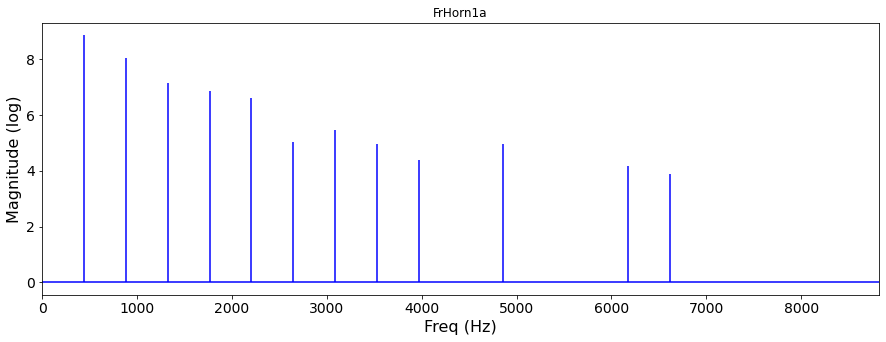

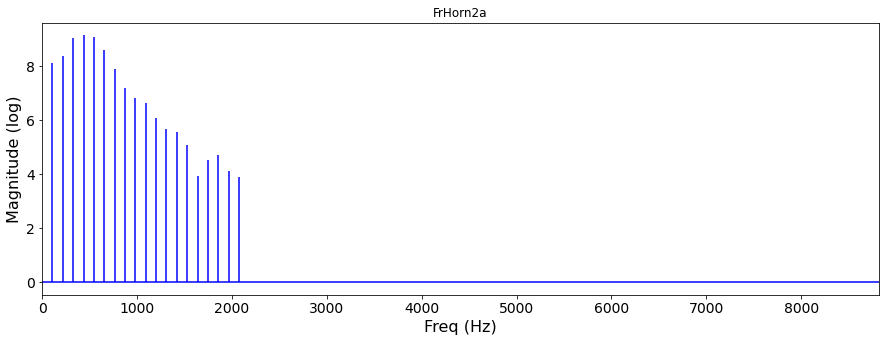

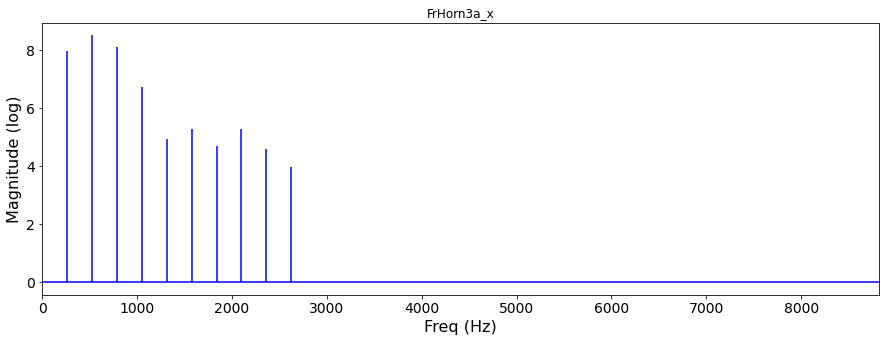

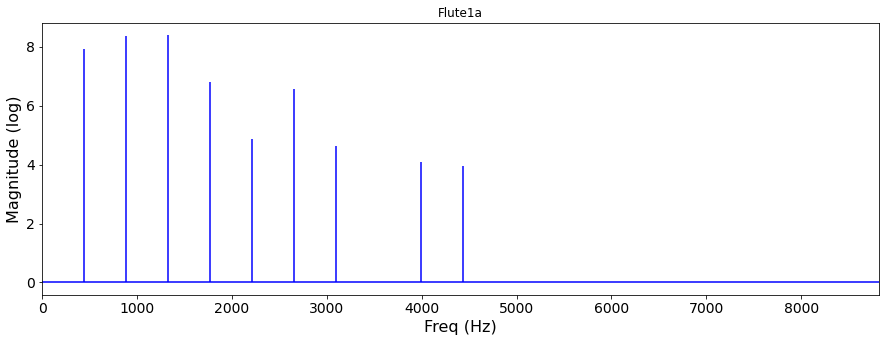

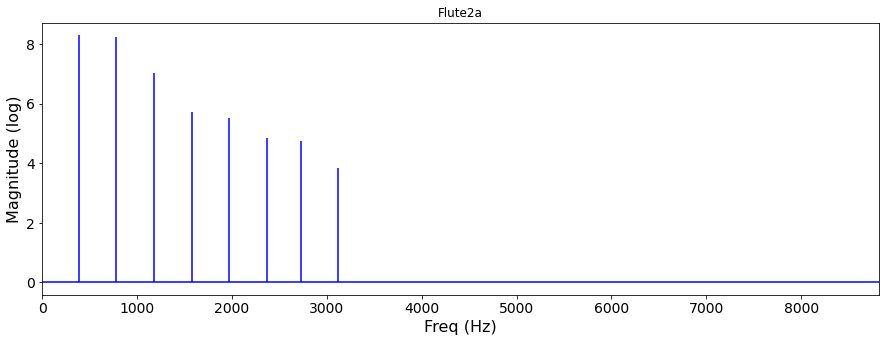

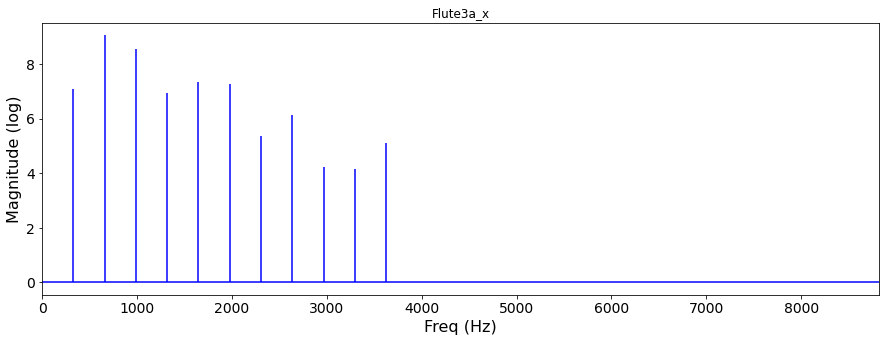

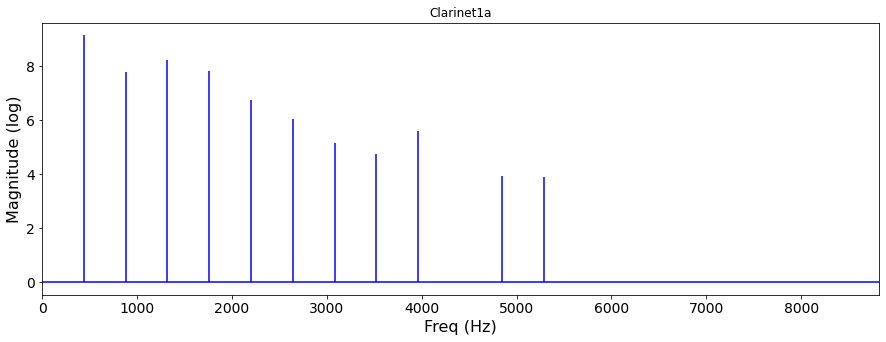

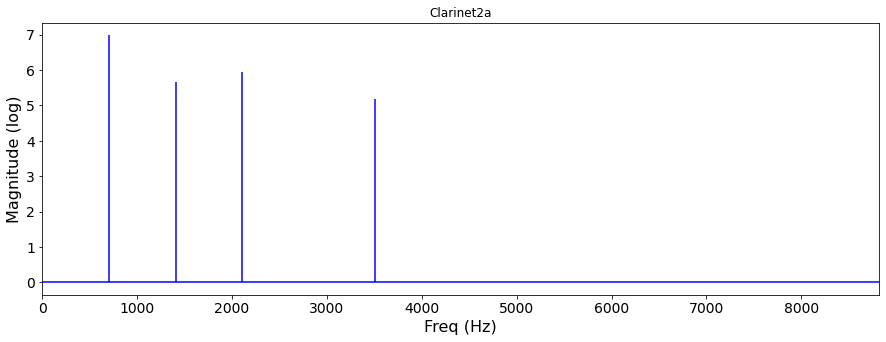

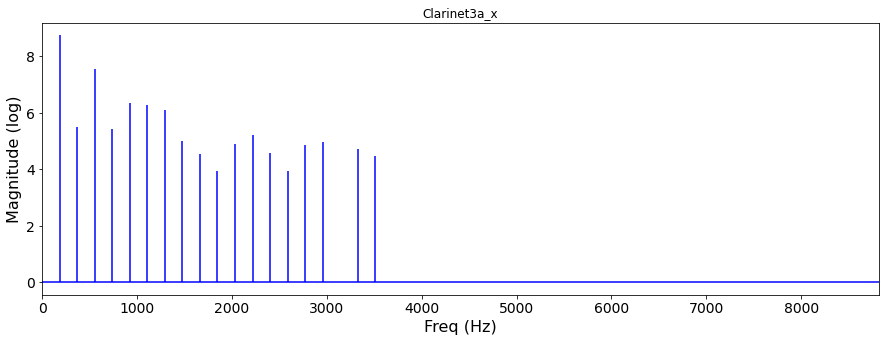

In [16]:
for i in range(len(objects)):
    objects[i].util_plot_spectrum_freqband(0,44100/4,sharpened=True,normalized=False)

## how the inter-peak distances are distributed

Bassoon1a [ 441.98198198  440.          441.98198198  440.          441.98198198
  440.          441.98198198  440.          441.98198198  440.
  441.98198198  440.          440.          441.98198198 1321.98198198
  441.98198198]
Bassoon2a [440. 440. 440. 440.]
Bassoon3a_x [440.         440.         440.         440.         440.
 440.         442.21105528 440.         440.         440.        ]
Viola1a [440.         440.         440.         440.         440.
 440.         440.         440.         437.98165138 440.
 442.01834862 440.         873.94495413 444.03669725]
Viola2a [ 442.23350254  442.23350254  440.          442.23350254  455.63451777
  413.19796954  442.23350254  871.06598985  882.23350254  882.23350254
  442.23350254 1346.80203046]
Viola3a_x [665.64102564 440.        ]
Cello1a [440. 440. 440. 440. 440. 416. 440. 440. 486. 442. 416. 464. 832. 488.
 446. 432.]
Cello2a [ 437.56906077  440.          437.56906077  440.          442.43093923
  435.13812155  442.43093923  440.

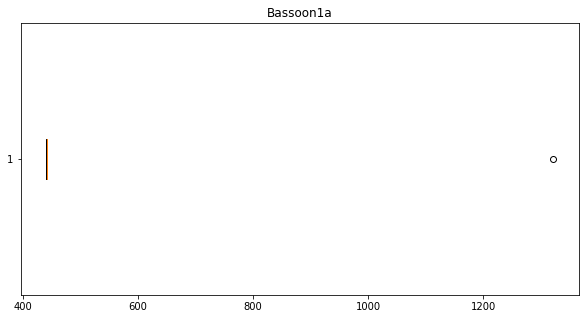

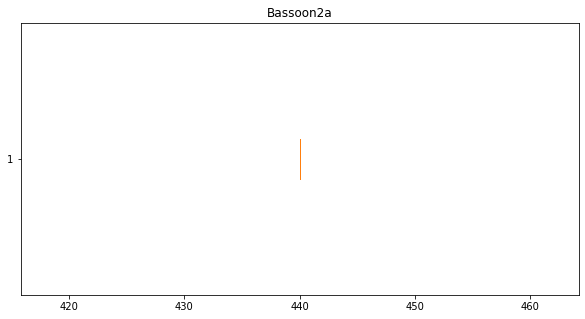

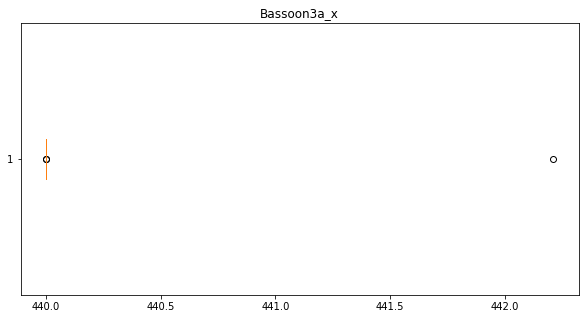

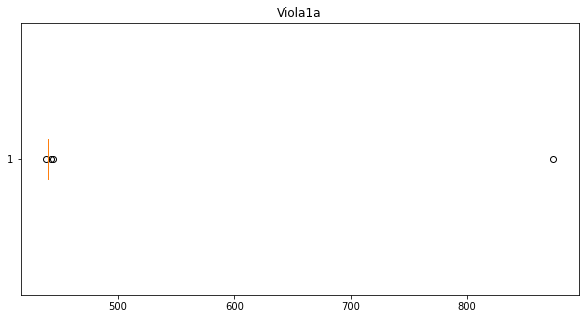

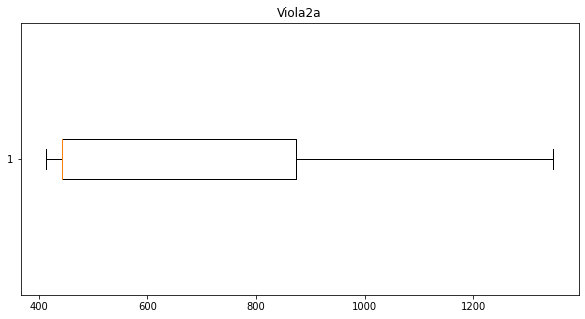

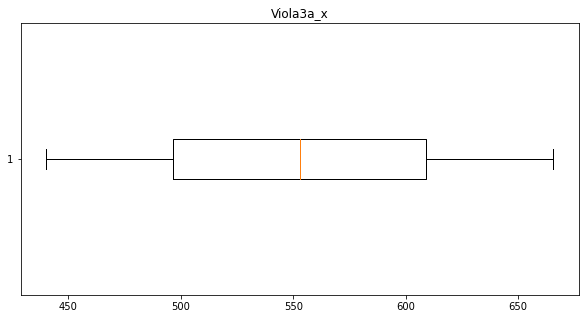

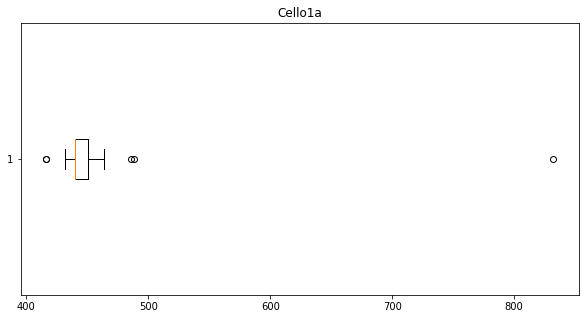

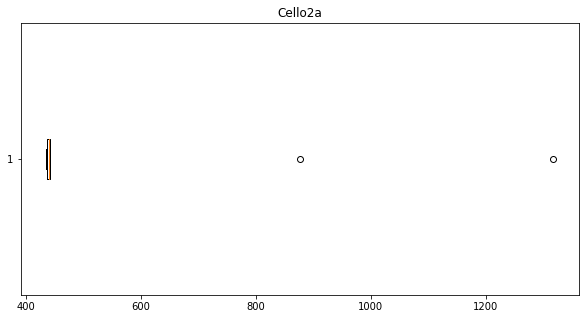

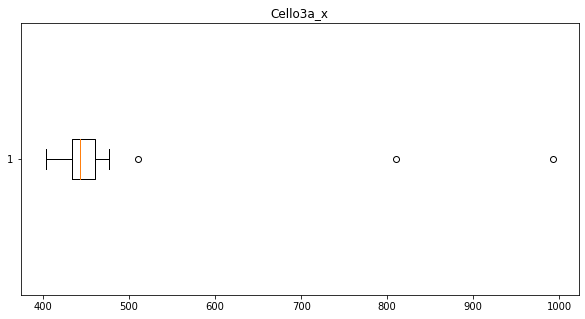

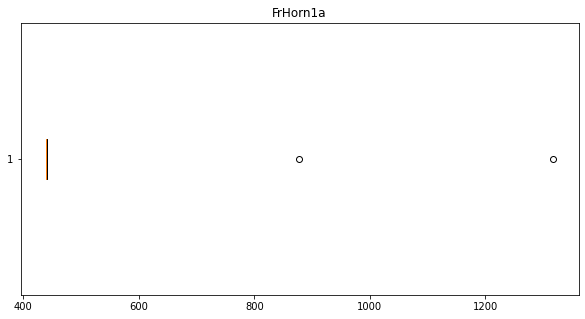

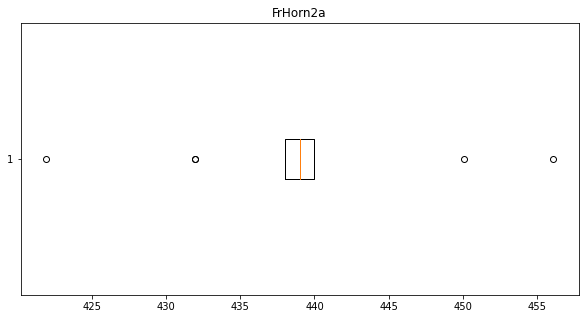

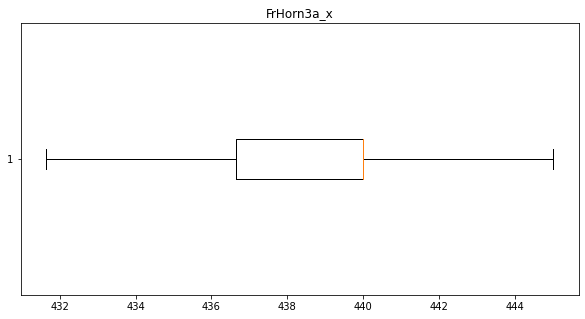

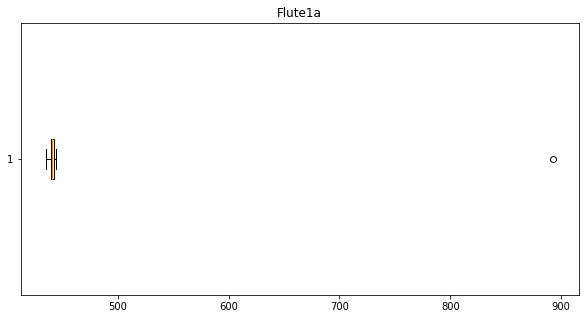

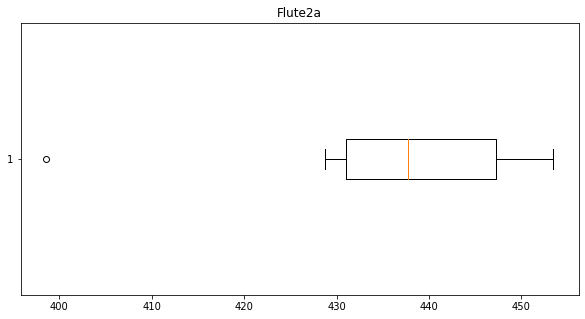

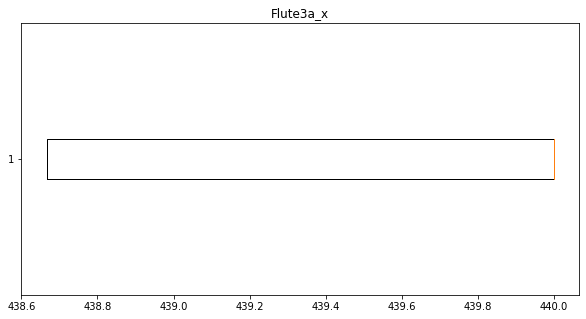

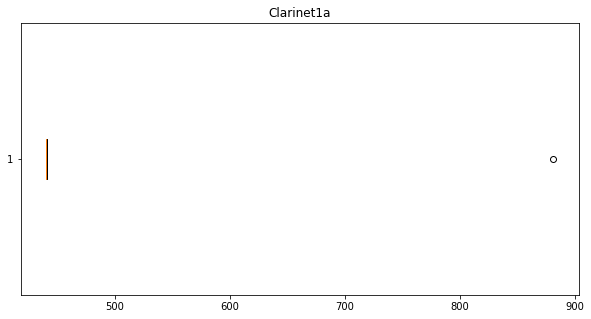

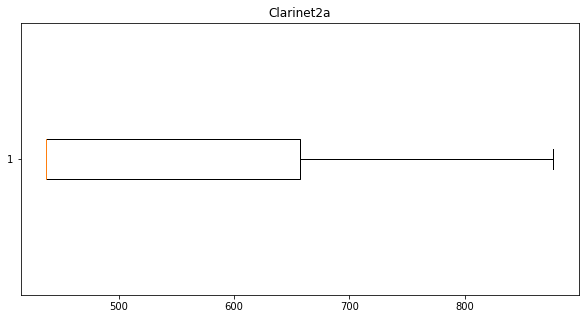

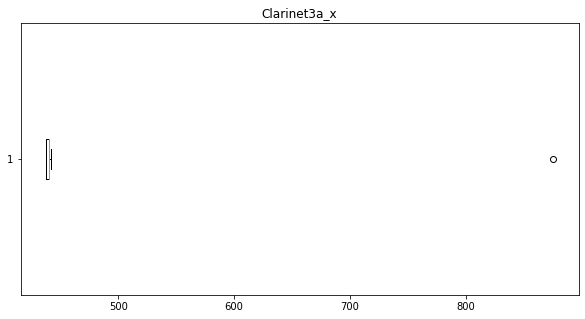

In [17]:
for i in range(len(objects)):
    objects[i].util_boxplot_of_peak_freq_dist()

In [18]:
import pandas as pd

In [19]:
dflog = pd.DataFrame(columns=['label', 'sps', 'samples', 'frqs', 'frqsz', 'normf', 'prom_0', 'peak_frqs_0', 'note', 'note_hz', 'ratio'])

ratiocheck_ = []
for i in range(len(objects)):
    oi = objects[i]
    
    a2a = [
        oi.label,
        oi.sps,
        oi.pcm_samples,
        len(oi.frqs),
        oi.frqsz,
        round(oi.peak_frqs[0],1),
        round(oi.proms_['prominences'][0],1),
        oi.peak_frqs_0,
        oi.libdef['note'],
        oi.util_parsenote(oi.libdef['note']),
        oi.peak_frqs_0 / oi.util_parsenote(oi.libdef['note'])    
    ]
    
    dflog = pd.concat([pd.DataFrame([a2a], columns=dflog.columns), dflog], ignore_index=True)
    
    if 0: 
        print('{:14s} sps={} spN={:5d} frqs={:5d} frqsz={:4.1f} normf={} {:8.1f} f0= {} {:4s} = {:6.1f} ratio={:4.2f}'.format(
            oi.label,
            oi.sps,
            oi.pcm_samples,
            len(oi.frqs),
            oi.frqsz,
            round(oi.peak_frqs[0],1),
            round(oi.proms_['prominences'][0],1),
            oi.peak_frqs_0,
            oi.libdef['note'],
            oi.util_parsenote(oi.libdef['note']),
            oi.peak_frqs_0 / oi.util_parsenote(oi.libdef['note'])
        ))
    ratiocheck_.append(oi.peak_frqs_0 / oi.util_parsenote(oi.libdef['note']))

In [20]:
dflog

,label,sps,samples,frqs,frqsz,normf,prom_0,peak_frqs_0,note,note_hz,ratio
0,Clarinet3a_x,44100,44100,22050,1.0,440.0,94.8,185.0,F#3,184.997211,1.000015
1,Clarinet2a,44100,8820,4410,5.0,440.0,1068.6,705.0,F5,698.456463,1.009369
2,Clarinet1a,44100,44100,22050,1.0,440.0,9242.3,440.0,A4,440.000000,1.000000
3,Flute3a_x,44100,44100,22050,1.0,440.0,1188.7,330.0,E4,329.627557,1.001130
4,Flute2a,44100,44100,22050,1.0,440.0,4001.4,393.0,G4,391.995436,1.002563
5,Flute1a,44100,44100,22050,1.0,440.0,2772.0,442.0,A4,440.000000,1.004545
6,FrHorn3a_x,44100,44100,22050,1.0,440.0,2839.0,263.0,C4,261.625565,1.005253
7,FrHorn2a,44100,88200,44100,0.5,440.0,3380.9,109.5,A2,110.000000,0.995455
8,FrHorn1a,44100,44100,22050,1.0,440.0,6952.1,442.0,A4,440.000000,1.004545
9,Cello3a_x,44100,44100,22050,1.0,440.0,1825.7,144.0,D3,146.832384,0.980710


In [21]:
dflog.describe()[['ratio']]

,ratio
count,18.000000
mean,1.003083
std,0.011313
min,0.980710
25%,1.000000
50%,1.001846
75%,1.005219
max,1.036571


In [22]:
dflog.describe()['ratio']['mean']

1.0030832137914396

In [23]:
dflog.describe()['ratio']['std']

0.011312786232834203

In [24]:
[  np.mean(ratiocheck_), np.var(ratiocheck_) ]

[1.0030832137914398, 0.00012086918055259182]

In [25]:
assert round(np.mean(ratiocheck_),2)==1 and np.var(ratiocheck_)*100 < (2/10)

In [26]:
#

In [27]:
#

In [28]:
#

In [29]:
#

### so, with the implemented pick_strategy (how to pick magnitude peaks), peak_frqs_0 always seems good!

In [30]:
for i in range(len(objects)):
    print(objects[i])

LABEL=Bassoon1a
len(pcm)=89670 sps=44100 pcm_win=[8820,52920] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9027345102111457 pcm_max=1.0
len(mags/frqs/phas)=22050 frq band=1.0
main_peak=18073.126276207626 at frq=445.0
peaks=1.0,10.699970841351389,..0.0295932213826233 at frqs=440.0,881.981981981982,..8377.837837837838 - freq0=222.0
pick_strategy=lowtrim2 no. peaks=17 maxnext_peak_dist=-1 
LABEL=Bassoon2a
len(pcm)=428309 sps=44100 pcm_win=[44100,88200] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9825539132541798 pcm_max=1.0
len(mags/frqs/phas)=22050 frq band=1.0
main_peak=7158.05905934869 at frq=440.0
peaks=1.0,0.9544646798670732,..0.0065160979130067 at frqs=440.0,880.0,..2200.0 - freq0=440.0
pick_strategy=lowtrim2 no. peaks=5 maxnext_peak_dist=-1 
LABEL=Bassoon3a_x
len(pcm)=364450 sps=44100 pcm_win=[88200,132300] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.8992187819542722 pcm_max=1.0


In [31]:
# storing the footprints int he library
for ddi in range(len(library)):
    dd=library[ddi]
    for i in range(len(objects)):
        if dd['label'] == objects[i].label:
            dd['footprint'] = objects[i].util_get_footprint()
            dd['footprint'].update({
                'label':dd['label'],
                'train':dd['train'],
                'istm':dd['istm'],
                'note':dd['note'],
            })

In [32]:
jsonout = []
for ddi in range(len(library)):
    dd=library[ddi]
    jsonout.append(dd['footprint'])

# saving the peaks

In [33]:
import json
with open('footprints.json', 'w') as f:
    json.dump(jsonout, f,indent=4)
print('json written with',len(library),'items')

json written with 18 items


# comment
* the number of peaks goes from 5 to ~20
* inter-peak distance goes from ~20 to ~440
* outliers: Viola3a_x with very low number_of_peaks
* Viola3a_x / Flute2a_x / Viola2a with very low maxnext_peak_dist

In [34]:
print('thank you.')

thank you.


# END OF feature-engineering document